**Examen Parcial** \
Tonantzin Real Rojas \
C.U. 163491

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

Modifiqué en Excel la base de datos para incluir una columna correspondiente únicamente a la hora del delito, de esta manera es más fácil trabajar con mi función

In [2]:
data = pd.read_csv('crime_dataE.csv',usecols=['crime','date','hour','lat','long','hora'])
data = pd.DataFrame(data=data)
data.head()

crime        date   hour        lat       long  hora
0  VIOLACION  30/09/2020  07:20  19.318714 -99.254418   7.0
1  VIOLACION  29/09/2020  22:30  19.378762 -99.205488  22.0
2  VIOLACION  29/09/2020  22:00  19.347971 -99.030162  22.0
3  VIOLACION  29/09/2020  23:30  19.557311 -99.134166  23.0
4  VIOLACION  27/09/2020  00:00  19.342125 -99.124280   0.1

In [3]:
data.dtypes

crime     object
date      object
hour      object
lat      float64
long     float64
hora     float64
dtype: object

Veamos cómo se ven nuestros datos

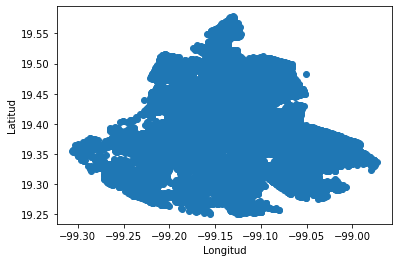

In [4]:
fig, ax = plt.subplots()
ax.scatter(data['long'],data['lat'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

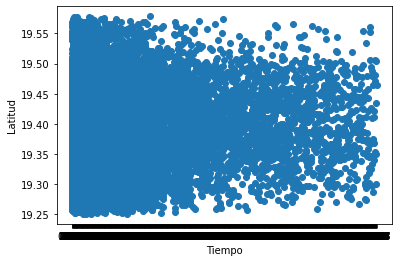

In [5]:
fig, ax = plt.subplots()
ax.scatter(data['hour'],data['lat'])
plt.ylabel('Latitud')
plt.xlabel('Tiempo')
plt.show()

In [6]:
x = data['long']
y = data['lat']
t = data['hora']
print('Longitudes \n'+'x: '+str(len(x))+ '\ny: '+str(len(y))+'\nt: ' +str(len(t)))

Longitudes 
x: 31056
y: 31056
t: 31056


Programamos a $$\phi(t,x) = x_1 + x_2\cdot ln(t) - ln(x_3\cdot t)$$

In [7]:
n = 8000

def phi(x=x,t=t):
    p = [None]*n
    for i in range(n):
        p[i] = x[i] + x[i+1]*log(abs(t[i])) - log(abs(x[i+2]*t[i]))
    return p

Verificamos que la longitud de $\phi(x)$ efectivamente sea de $n=8000$

In [8]:
len(phi())

8000

Programamos a $$f(x) = \sum_{j=1}^{8000}r_j(x)^2$$

In [9]:
def f(y=y,x=x,t=t):
    r = [None]*n
    p = phi(x,t)
    
    for i in range(n):
        r[i] = (y[i]-p[i])**2
        
    return '%.4f' %sum(r)    

Probamos nuestra función con unos valores y obtenemos:

In [10]:
f()

'1068834666.9950'